In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/original-instant-gratification/sample_submission.csv
/kaggle/input/original-instant-gratification/train.csv
/kaggle/input/original-instant-gratification/public_test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gc

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv('/kaggle/input/original-instant-gratification/train.csv', engine="pyarrow")
test = pd.read_csv('/kaggle/input/original-instant-gratification/public_test.csv', engine="pyarrow")
submission = pd.read_csv('/kaggle/input/original-instant-gratification/sample_submission.csv')

In [4]:
train.shape

(262144, 258)

In [5]:
test.shape

(262144, 257)

In [6]:
print(train['id'].nunique())

262144


In [7]:
test['id'].nunique()

262144

In [8]:
set(train['id'].unique()).intersection(set(test['id'].unique()))

set()

<Axes: >

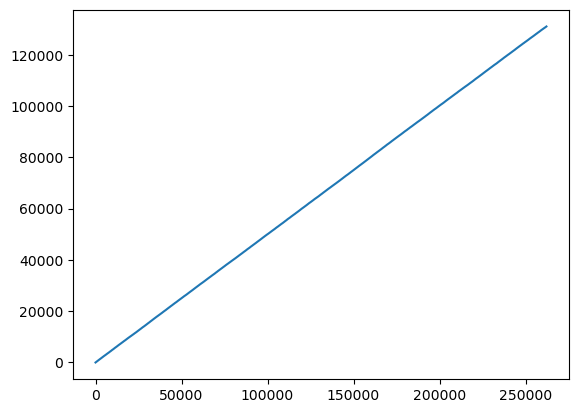

In [9]:
# target 별 누적값 변화 파악
train['target'].cumsum().plot()

- 해당 그래프를 통해 일정하게 증가하는 것으로 판단

0    131079
1    131065
Name: target, dtype: int64


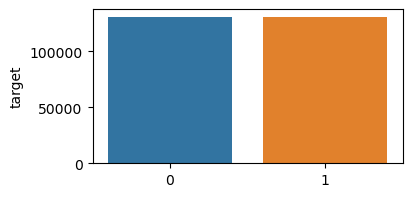

In [10]:
# target 0, 1 별 분포 차이 확인
print(train['target'].value_counts())
plt.figure(figsize=(4,2))
sns.barplot(x=train['target'].value_counts().index, y=train['target'].value_counts());

- 일정한 분포를 가지는 것으로 확인

In [11]:
# Null 값이 포함되어 있는지 사전 확인
train.isnull().sum().sum()

0

- Null 값은 없는 것으로 확인 ( Lucky! ), 만약 있다면 따로 분포에 대해 추가 분석해보아야 함

In [12]:
null_value_df = train.isnull().sum().rename_axis('column').reset_index(name='null_count')
null_value_df['ratio'] = null_value_df['null_count']/train.shape[0]*100
null_value_df

,column,null_count,ratio
0,hasty-gold-flamingo-novice,0,0.0
1,smelly-chocolate-dogfish-fimbus,0,0.0
2,woolly-flax-moth-unsorted,0,0.0
3,homey-emerald-beagle-grandmaster,0,0.0
4,crabby-ochre-iguana-golden,0,0.0
...,...,...,...
253,blurry-chocolate-ostrich-pembus,0,0.0
254,silly-indigo-jackal-distraction,0,0.0
255,squirrely-amber-rabbit-golden,0,0.0
256,target,0,0.0


In [13]:
train.dtypes.value_counts()

float64    255
int64        2
object       1
dtype: int64

In [14]:
train.select_dtypes(include=['category','object','int64']).head()

,wheezy-copper-turtle-magic,target,id
0,158,0,10a93253fe00464ea15eab10de90586e
1,358,0,a957370a7ace4aba88ac0deab67b428c
2,290,0,a304905e2f2e4436a63f76fc819366cc
3,471,1,1403d81e619042d99a23d02655a4de3d
4,127,1,dfcd941dbeec47ec819bb643f358b651


In [15]:
train_columns = [c for c in train.columns if c not in ['id','target']]
train[train_columns].nunique(axis=1)

0         256
1         256
2         256
3         256
4         256
         ... 
262139    256
262140    256
262141    256
262142    256
262143    256
Length: 262144, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


185

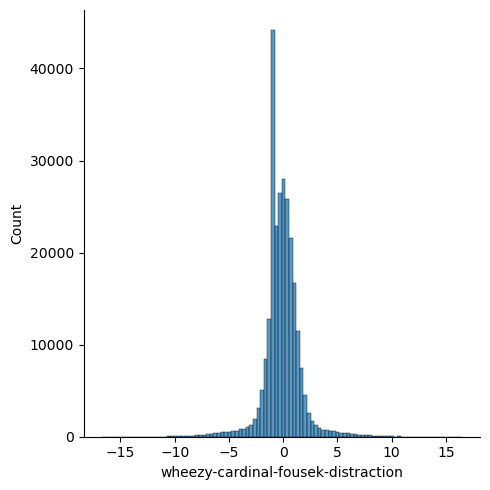

In [16]:
train_null = train.copy()
train_null.loc[np.random.random_sample(train_null.shape[0])<0.1,'wheezy-cardinal-fousek-distraction'] = np.nan
train_null.loc[train_null['wheezy-cardinal-fousek-distraction'].isnull(),'wheezy-cardinal-fousek-distraction'] = -1
sns.displot(train_null['wheezy-cardinal-fousek-distraction'],bins=100, kde=False)
del train_null
gc.collect()

In [17]:
train_columns = [c for c in train.columns if c not in ['id','target']]
train[train_columns].nunique()

hasty-gold-flamingo-novice           262144
smelly-chocolate-dogfish-fimbus      262144
woolly-flax-moth-unsorted            262144
homey-emerald-beagle-grandmaster     262144
crabby-ochre-iguana-golden           262144
                                      ...  
geeky-amaranth-wolfhound-unsorted    262144
randy-red-molly-learn                262144
blurry-chocolate-ostrich-pembus      262144
silly-indigo-jackal-distraction      262144
squirrely-amber-rabbit-golden        262144
Length: 256, dtype: int64

In [18]:
# 범주형 feature인 'wheezy-cooper-turtle-magic' 추가 분석
print(np.where(train[train_columns].nunique()<250000))
print(train_columns[146])
train['wheezy-copper-turtle-magic'].nunique()

(array([182]),)
stuffy-magnolia-emu-unsorted


512

- 다른 feature와 달리 512개만 존재, 의심

512.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


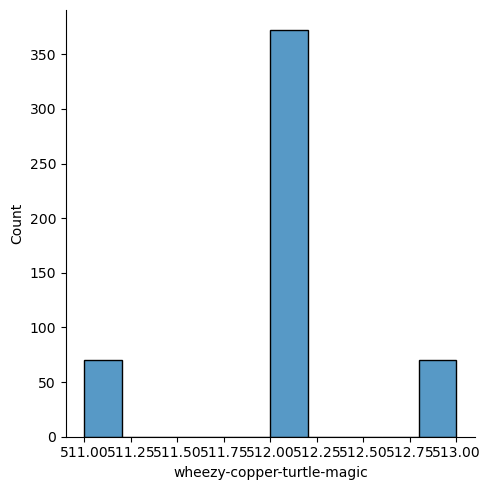

,wheezy-copper-turtle-magic,counts
0,14,513
1,459,513
2,292,513
3,296,513
4,355,513
...,...,...
507,395,511
508,182,511
509,366,511
510,419,511


In [19]:
# 의심 feature에 대해 어떤 값들을 가지는 지 분석, 시각화
print(train['wheezy-copper-turtle-magic'].value_counts().mean())
sns.displot(train['wheezy-copper-turtle-magic'].value_counts())
plt.show()
train['wheezy-copper-turtle-magic'].value_counts().rename_axis('wheezy-copper-turtle-magic').reset_index(name='counts')

- 511, 512, 513 중 하나의 값만 가지는 것으로 확인

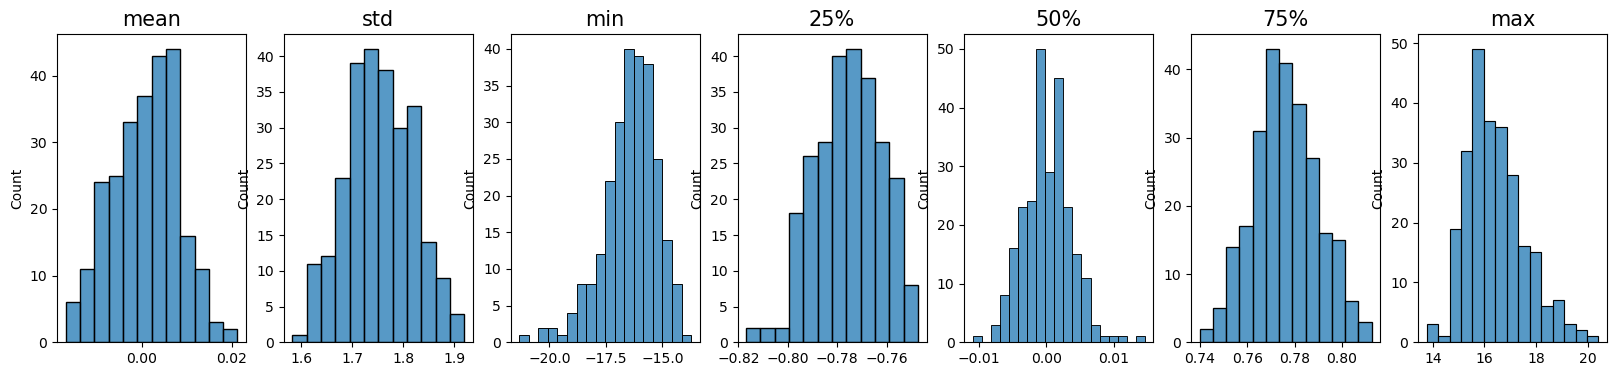

/tmp/ipykernel_20/1218757470.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  describe_train.T.style.background_gradient(cmap, axis=1).set_precision(2)


In [20]:
train_columns = [c for c in train.columns if c not in ['id','target','wheezy-copper-turtle-magic']]
describe_train = train[train_columns].describe().T.drop('count', axis=1)
f, a = plt.subplots(1, 7, figsize=(20, 4))
for i, name in enumerate(describe_train.columns):
    ax = a[i]
    sns.histplot(describe_train[name], ax=ax)
    ax.set_title(name, fontsize=15)
    ax.set_xlabel('')
# plt.tight_layout()
plt.show()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
describe_train.T.style.background_gradient(cmap, axis=1).set_precision(2)

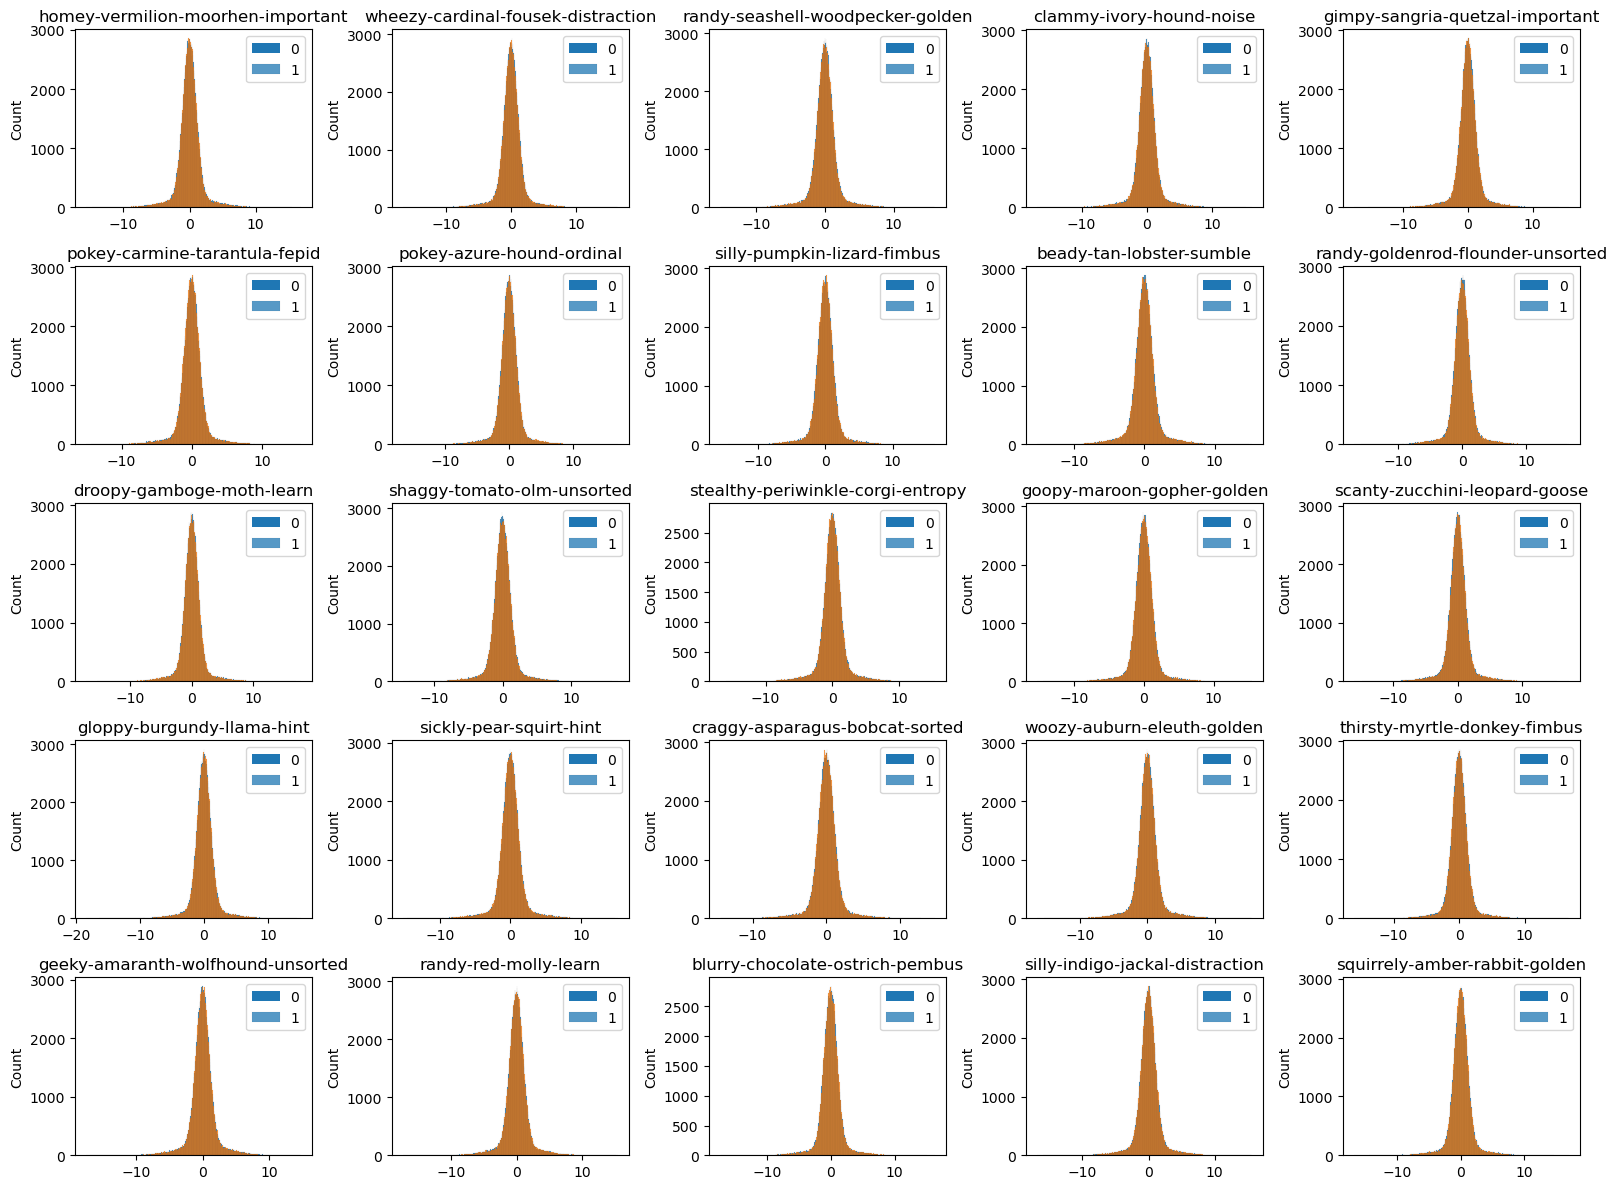

In [21]:
train_columns = [c for c in train.columns if c not in ['id','target']]
target_0_df = train.loc[train['target']==0]
target_1_df = train.loc[train['target']==1]
plt.figure(figsize=(16,12))
for i, name in enumerate(train_columns[-25:]):
    plt.subplot(5,5,i+1)
    sns.histplot(target_0_df[name])
    sns.histplot(target_1_df[name])
    plt.title(name)
    plt.xlabel('')
    plt.legend(['0','1'])
    
plt.tight_layout()
plt.show()

In [22]:
[c for c in train.columns if c.find('pembus')!=-1]

['geeky-ochre-cuscus-pembus',
 'tasty-emerald-fox-pembus',
 'cheeky-tan-koala-pembus',
 'gloppy-brass-beetle-pembus',
 'snoopy-vermilion-okapi-pembus',
 'stealthy-rust-kiwi-pembus',
 'cozy-blue-schnauzer-pembus',
 'cozy-burgundy-monkey-pembus',
 'homely-azure-walrus-pembus',
 'homely-auburn-dragonfly-pembus',
 'blurry-chocolate-ostrich-pembus']

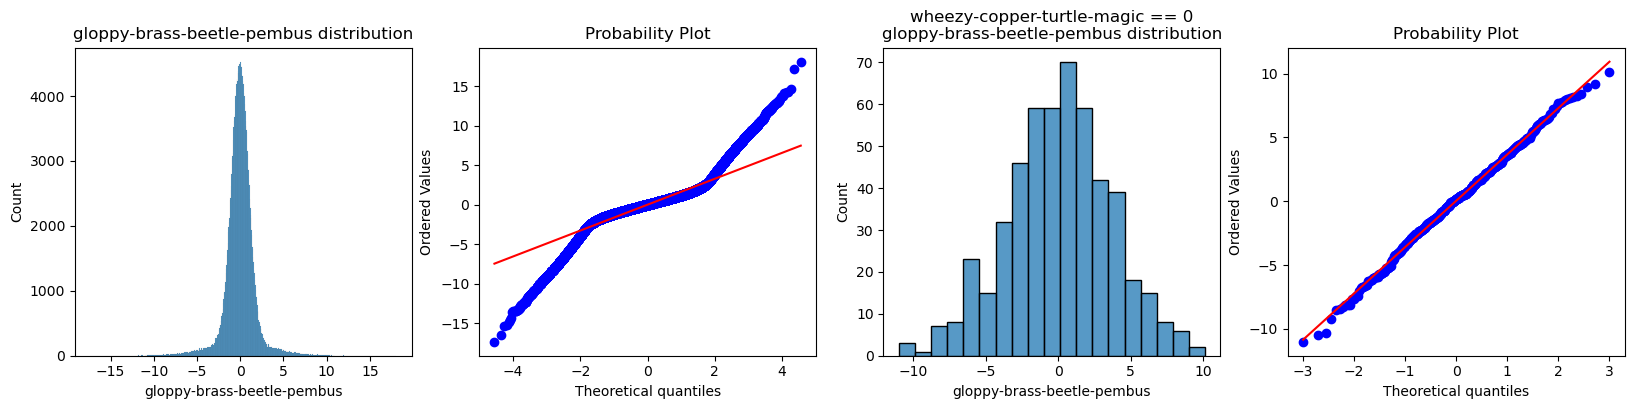

In [23]:
from scipy.stats import probplot

f, a = plt.subplots(1,4,figsize=(20,4))
sns.histplot(train['gloppy-brass-beetle-pembus'], ax=a[0])
a[0].set_title('gloppy-brass-beetle-pembus distribution')
probplot(train['gloppy-brass-beetle-pembus'], plot=a[1])

sns.histplot(train.loc[train['wheezy-copper-turtle-magic']==0,'gloppy-brass-beetle-pembus'],ax=a[2])
a[2].set_title('wheezy-copper-turtle-magic == 0\ngloppy-brass-beetle-pembus distribution')
probplot(train.loc[train['wheezy-copper-turtle-magic']==0,'gloppy-brass-beetle-pembus'], plot=a[3])
plt.show()

In [24]:
# 확률 분포의 뾰족한 정도인 첨도(Kurtosis) 확인, 분포의 비대칭도인 왜도(Skewness) 확인
from scipy.stats import kurtosis, skew
print(kurtosis(train['gloppy-brass-beetle-pembus'])) # 위로 뾰족한 분포
print(skew(train['gloppy-brass-beetle-pembus'])) # 우측으로 치우져짐

7.774306562008123
-0.07387343704829026


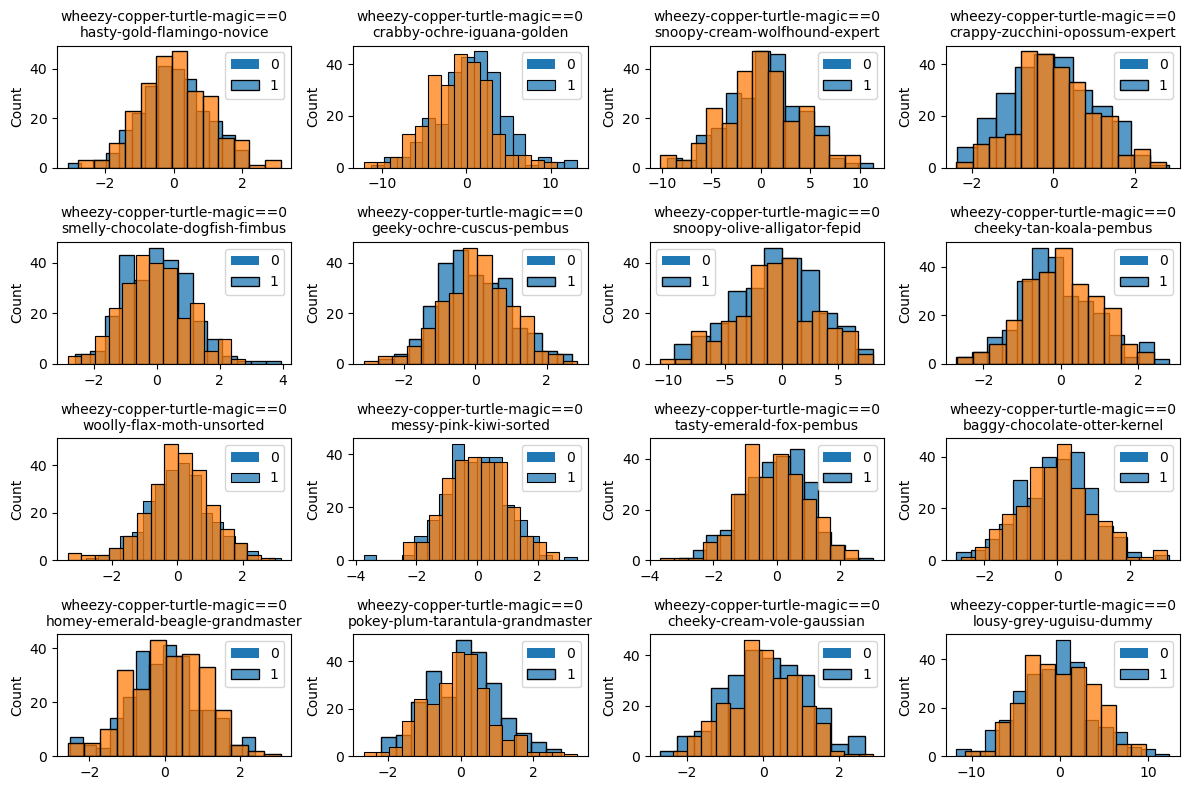

In [25]:
train_columns = [c for c in train.columns if c not in ['id','target']]
temp = train.loc[train['wheezy-copper-turtle-magic']==0]
target_0_df = temp.loc[temp['target']==0]
target_1_df = temp.loc[temp['target']==1]
f, a = plt.subplots(4, 4, figsize=(12,8))
for i, name in enumerate(train_columns[:16]):
    row = int(i%4)
    col = int(i/4)
    ax = a[row][col]
    sns.histplot(target_0_df[name], ax=ax)
    sns.histplot(target_1_df[name], ax=ax)
    std = target_0_df[name].std()
    ax.set_title(f'wheezy-copper-turtle-magic==0\n{name}',fontsize=10)
    ax.set_xlabel('')
    ax.legend(['0','1'])
    
plt.tight_layout()
plt.show()

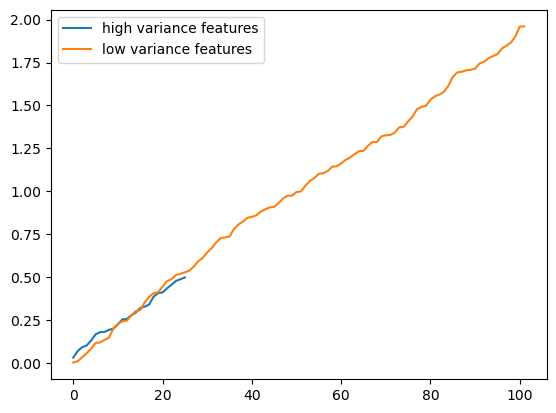

In [26]:
from sklearn.feature_selection import mutual_info_classif
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
temp = train.loc[train['wheezy-copper-turtle-magic']==0]
mi = mutual_info_classif(temp[train_columns].values, temp['target'], discrete_features=False)

feature_stds = temp[train_columns].std().values

plt.plot(np.cumsum(mi[(feature_stds>1.5)&(mi!=0)]), label='high variance features')
plt.plot(np.cumsum(mi[(feature_stds<1.5)&(mi!=0)]), label='low variance features')
plt.legend()
plt.show()

((array([-2.99932623e+00, -2.71801008e+00, -2.55987271e+00, -2.44776549e+00,
         -2.35993808e+00, -2.28724627e+00, -2.22494516e+00, -2.17024373e+00,
         -2.12135601e+00, -2.07706759e+00, -2.03651380e+00, -1.99905636e+00,
         -1.96421017e+00, -1.93159761e+00, -1.90091873e+00, -1.87193118e+00,
         -1.84443622e+00, -1.81826880e+00, -1.79329024e+00, -1.76938292e+00,
         -1.74644612e+00, -1.72439295e+00, -1.70314789e+00, -1.68264485e+00,
         -1.66282570e+00, -1.64363898e+00, -1.62503893e+00, -1.60698466e+00,
         -1.58943951e+00, -1.57237043e+00, -1.55574755e+00, -1.53954377e+00,
         -1.52373442e+00, -1.50829698e+00, -1.49321085e+00, -1.47845710e+00,
         -1.46401834e+00, -1.44987850e+00, -1.43602273e+00, -1.42243731e+00,
         -1.40910945e+00, -1.39602730e+00, -1.38317980e+00, -1.37055664e+00,
         -1.35814816e+00, -1.34594535e+00, -1.33393973e+00, -1.32212336e+00,
         -1.31048876e+00, -1.29902890e+00, -1.28773714e+00, -1.27660723e+00,

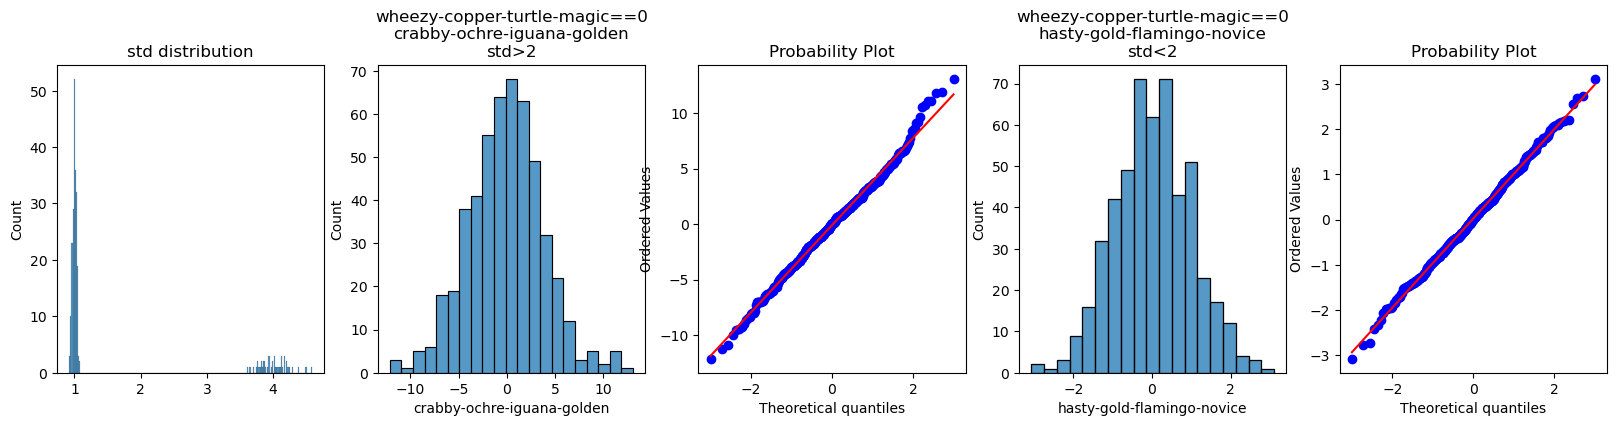

In [27]:
f, a = plt.subplots(1,5,figsize=(20,4))
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
temp = train.loc[train['wheezy-copper-turtle-magic']==0,train_columns].std()
sns.histplot(temp,ax=a[0])
a[0].set_title('std distribution')
useful = list(temp.index.values[temp>2])
useless = list(temp.index.values[temp<2])
sns.histplot(train.loc[train['wheezy-copper-turtle-magic']==0,useful[0]],ax=a[1])
a[1].set_title(f'wheezy-copper-turtle-magic==0\n{useful[0]}\nstd>2')
probplot(train.loc[train['wheezy-copper-turtle-magic']==0,useful[0]], plot=a[2])
sns.histplot(train.loc[train['wheezy-copper-turtle-magic']==0,useless[0]],ax=a[3])
a[3].set_title(f'wheezy-copper-turtle-magic==0\n{useless[0]}\nstd<2')
probplot(train.loc[train['wheezy-copper-turtle-magic']==0,useless[0]], plot=a[4])

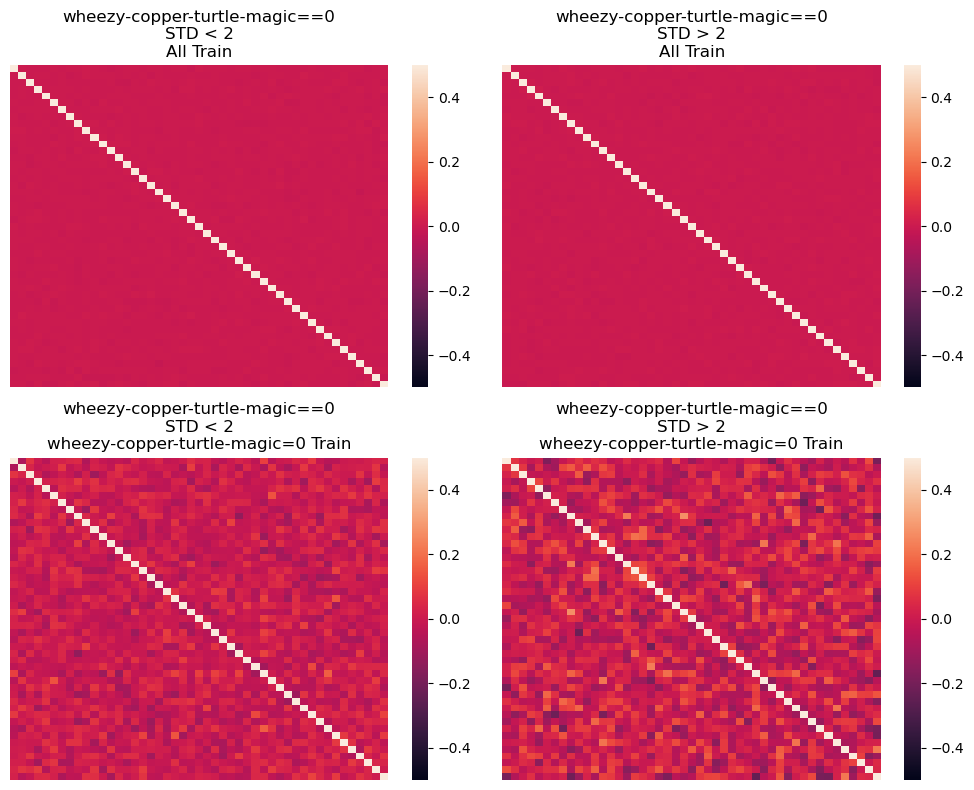

In [28]:
f, a = plt.subplots(2,2,figsize=(10,8))
vmin = -0.5
vmax = 0.5
sns.heatmap(train[useless[:len(useful)]+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[0][0])
a[0][0].set_title('wheezy-copper-turtle-magic==0\nSTD < 2\nAll Train')
sns.heatmap(train[useful+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[0][1])
a[0][1].set_title('wheezy-copper-turtle-magic==0\nSTD > 2\nAll Train')
sns.heatmap(train.loc[train['wheezy-copper-turtle-magic']==0,useless[:len(useful)]+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[1][0])
a[1][0].set_title('wheezy-copper-turtle-magic==0\nSTD < 2\nwheezy-copper-turtle-magic=0 Train')
sns.heatmap(train.loc[train['wheezy-copper-turtle-magic']==0,useful+['target']].corr(), vmin=vmin, vmax=vmax,xticklabels=False, yticklabels=False,ax=a[1][1])
a[1][1].set_title('wheezy-copper-turtle-magic==0\nSTD > 2\nwheezy-copper-turtle-magic=0 Train')
plt.tight_layout()
plt.show()

In [29]:
variance_over_2std = {}
for i in range(512):
    x_train = train[train['wheezy-copper-turtle-magic'] == i]
    x_test = test[test['wheezy-copper-turtle-magic'] == i]

    train_std = x_train[train_columns].std()
    cols = list(train_std.index.values[np.where(train_std >2)])
    variance_over_2std[i] = cols.copy()

In [30]:
intersect_count = np.zeros((512,512))
for k, v in variance_over_2std.items():
    for k1, v1 in variance_over_2std.items():
        intersect_count[k,k1] = len(set(v).intersection(set(v1)))

In [31]:
pd.DataFrame.from_dict(variance_over_2std, orient='index')

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,crabby-ochre-iguana-golden,snoopy-cream-wolfhound-expert,snoopy-olive-alligator-fepid,lousy-grey-uguisu-dummy,bluesy-mustard-dragonfly-kernel,squirrely-sangria-hamster-entropy,stuffy-crimson-mandrill-important,pasty-orange-mau-distraction,gamy-ultramarine-dolphin-fepid,bumpy-emerald-cat-dummy,...,blurry-burgundy-blue-fimbus,cranky-apricot-deer-master,squeaky-pumpkin-budgerigar-dataset,snappy-apricot-otter-grandmaster,jumpy-carmine-axolotl-learn,boozy-malachite-beetle-discard,pokey-azure-hound-ordinal,stealthy-periwinkle-corgi-entropy,goopy-maroon-gopher-golden,None
1,snoopy-olive-alligator-fepid,skimpy-violet-impala-discard,clammy-russet-ostrich-master,geeky-red-collie-entropy,thirsty-cream-chinook-hint,skimpy-mauve-quoll-fimbus,gloppy-firebrick-maltese-goose,bluesy-tan-bandicoot-expert,bumpy-flax-quoll-grandmaster,greasy-amethyst-snail-hint,...,blurry-chocolate-ostrich-pembus,None,None,None,None,None,None,None,None,None
2,snoopy-olive-alligator-fepid,foggy-champagne-horse-noise,geeky-red-collie-entropy,goopy-aquamarine-octopus-master,flaky-pumpkin-pinscher-master,stealthy-turquoise-catfish-entropy,skimpy-mauve-quoll-fimbus,gloppy-firebrick-maltese-goose,bumpy-emerald-cat-dummy,thirsty-sepia-coral-contributor,...,None,None,None,None,None,None,None,None,None,None
3,geeky-ochre-cuscus-pembus,snoopy-cream-wolfhound-expert,tasty-emerald-fox-pembus,cheeky-cream-vole-gaussian,snippy-cerise-discus-sorted,silly-pumpkin-rat-hint,bumpy-copper-beetle-dummy,bumpy-flax-quoll-grandmaster,silly-denim-otter-grandmaster,squirrely-champagne-hippopotamus-important,...,surly-silver-horse-sorted,snappy-apricot-otter-grandmaster,scanty-zucchini-leopard-goose,thirsty-myrtle-donkey-fimbus,blurry-chocolate-ostrich-pembus,None,None,None,None,None
4,skimpy-violet-impala-discard,clammy-russet-ostrich-master,squirrely-sangria-hamster-entropy,goopy-aquamarine-octopus-master,snippy-chartreuse-civet-ordinal,greasy-asparagus-serval-grandmaster,snippy-turquoise-gerbil-gaussian,lousy-apricot-moose-novice,pasty-orange-mau-distraction,boozy-coral-tapir-hint,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,crabby-ochre-iguana-golden,cheeky-cream-vole-gaussian,lousy-grey-uguisu-dummy,snippy-myrtle-frog-sorted,squirrely-sangria-hamster-entropy,snippy-cerise-discus-sorted,gloppy-brass-beetle-pembus,squeaky-orange-affenpinscher-unsorted,hilly-dandelion-otter-grandmaster,goopy-grey-walrus-important,...,None,None,None,None,None,None,None,None,None,None
508,snoopy-cream-wolfhound-expert,cheeky-cream-vole-gaussian,cheeky-tan-koala-pembus,skimpy-violet-impala-discard,thirsty-cream-chinook-hint,pokey-coral-fox-important,cheeky-chocolate-gecko-distraction,gamy-ultramarine-dolphin-fepid,bumpy-flax-quoll-grandmaster,homey-razzmatazz-seahorse-kernel,...,sickly-maroon-capybara-dummy,surly-silver-horse-sorted,queasy-crimson-paradise-entropy,clammy-firebrick-mayfly-ordinal,craggy-asparagus-bobcat-sorted,randy-red-molly-learn,squirrely-amber-rabbit-golden,None,None,None
509,hasty-gold-flamingo-novice,cheeky-tan-koala-pembus,homey-amaranth-numbat-expert,goopy-aquamarine-octopus-master,stuffy-crimson-mandrill-important,lousy-apricot-moose-novice,cheeky-chocolate-gecko-distraction,gamy-ultramarine-dolphin-fepid,bumpy-emerald-cat-dummy,clammy-auburn-wallaby-expert,...,None,None,None,None,None,None,None,None,None,None
510,messy-pink-kiwi-sorted,cheeky-tan-koala-pembus,baggy-chocolate-otter-kernel,snippy-myrtle-frog-sorted,flaky-pumpkin-pinscher-master,nerdy-firebrick-otter-fimbus,bumpy-emerald-cat-dummy,queasy-beige-penguin-gaussian,silly-pumpkin-rat-hint,bumpy-copper-beetle-dummy,...,pokey-azure-hound-ordinal,woozy-auburn-eleuth-golden,randy-red-molly-learn,silly-indigo-jackal-distraction,None,None,None,None,None,None


<Axes: >

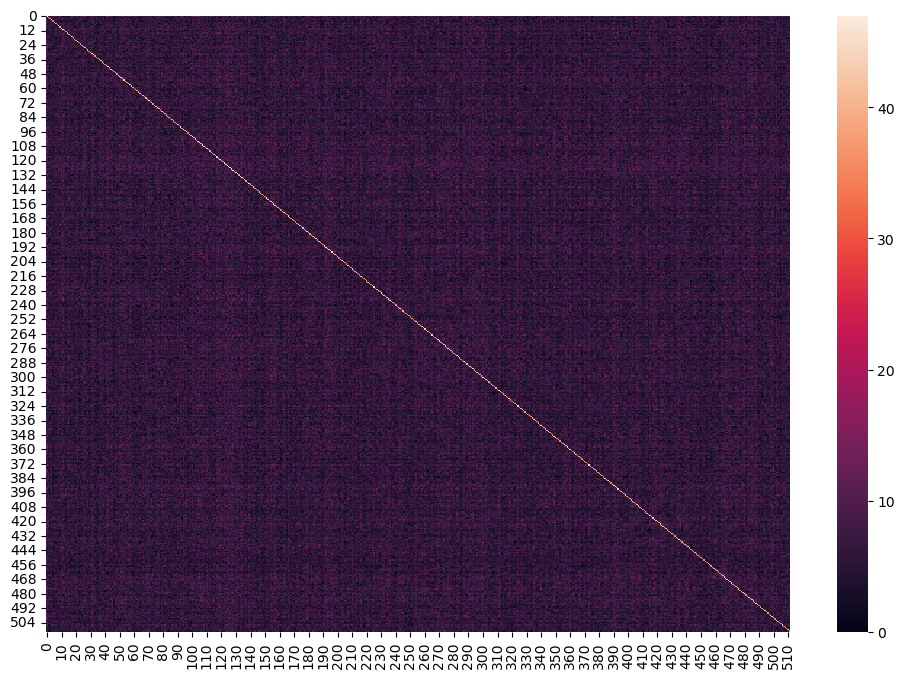

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(intersect_count))

<Axes: ylabel='Count'>

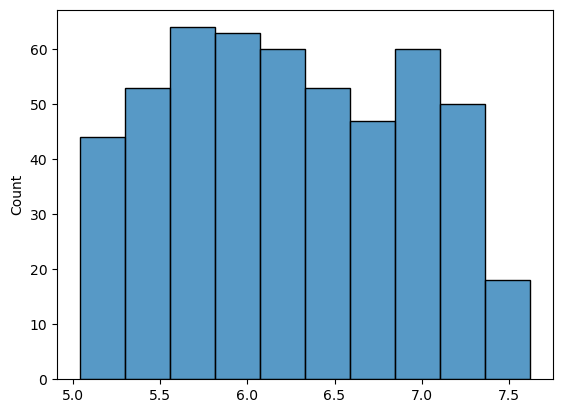

In [33]:
sns.histplot(pd.DataFrame(intersect_count).mean())

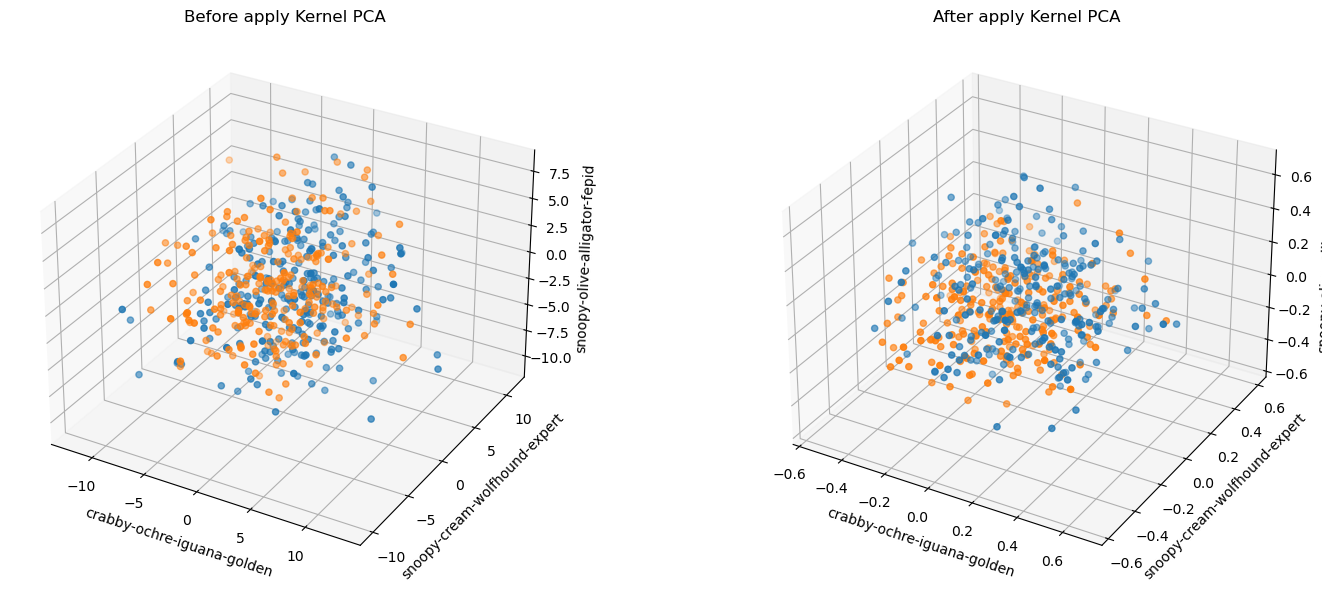

In [34]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import animation
from sklearn.decomposition import KernelPCA
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
x_train = train[train['wheezy-copper-turtle-magic'] == 0].reset_index(drop=True)
train_std = x_train[train_columns].std()
cols = list(train_std.index.values[np.where(train_std >2)])

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1, projection='3d') # Axe3D object
target1 = x_train.loc[x_train['target']==1]
target0 = x_train.loc[x_train['target']==0]
ax.scatter(target0[cols[0]],target0[cols[1]],target0[cols[2]])
ax.scatter(target1[cols[0]],target1[cols[1]],target1[cols[2]])
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
ax.set_zlabel(cols[2])
ax.set_title("Before apply Kernel PCA")

ax1 = fig.add_subplot(1,2,2,projection='3d') # Axe3D object
pca_transform = KernelPCA(n_components=len(cols), kernel='cosine',random_state=1).fit_transform(x_train[cols])
for i in range(len(cols)):
    x_train.loc[:, f'kpca_{i}'] = pca_transform[:,i]
target1 = x_train.loc[x_train['target']==1]
target0 = x_train.loc[x_train['target']==0]
ax1.scatter(target0['kpca_0'],target0['kpca_1'],target0['kpca_2'])
ax1.scatter(target1['kpca_0'],target1['kpca_1'],target1['kpca_2'])
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.set_zlabel(cols[2])
ax1.set_title("After apply Kernel PCA")

plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


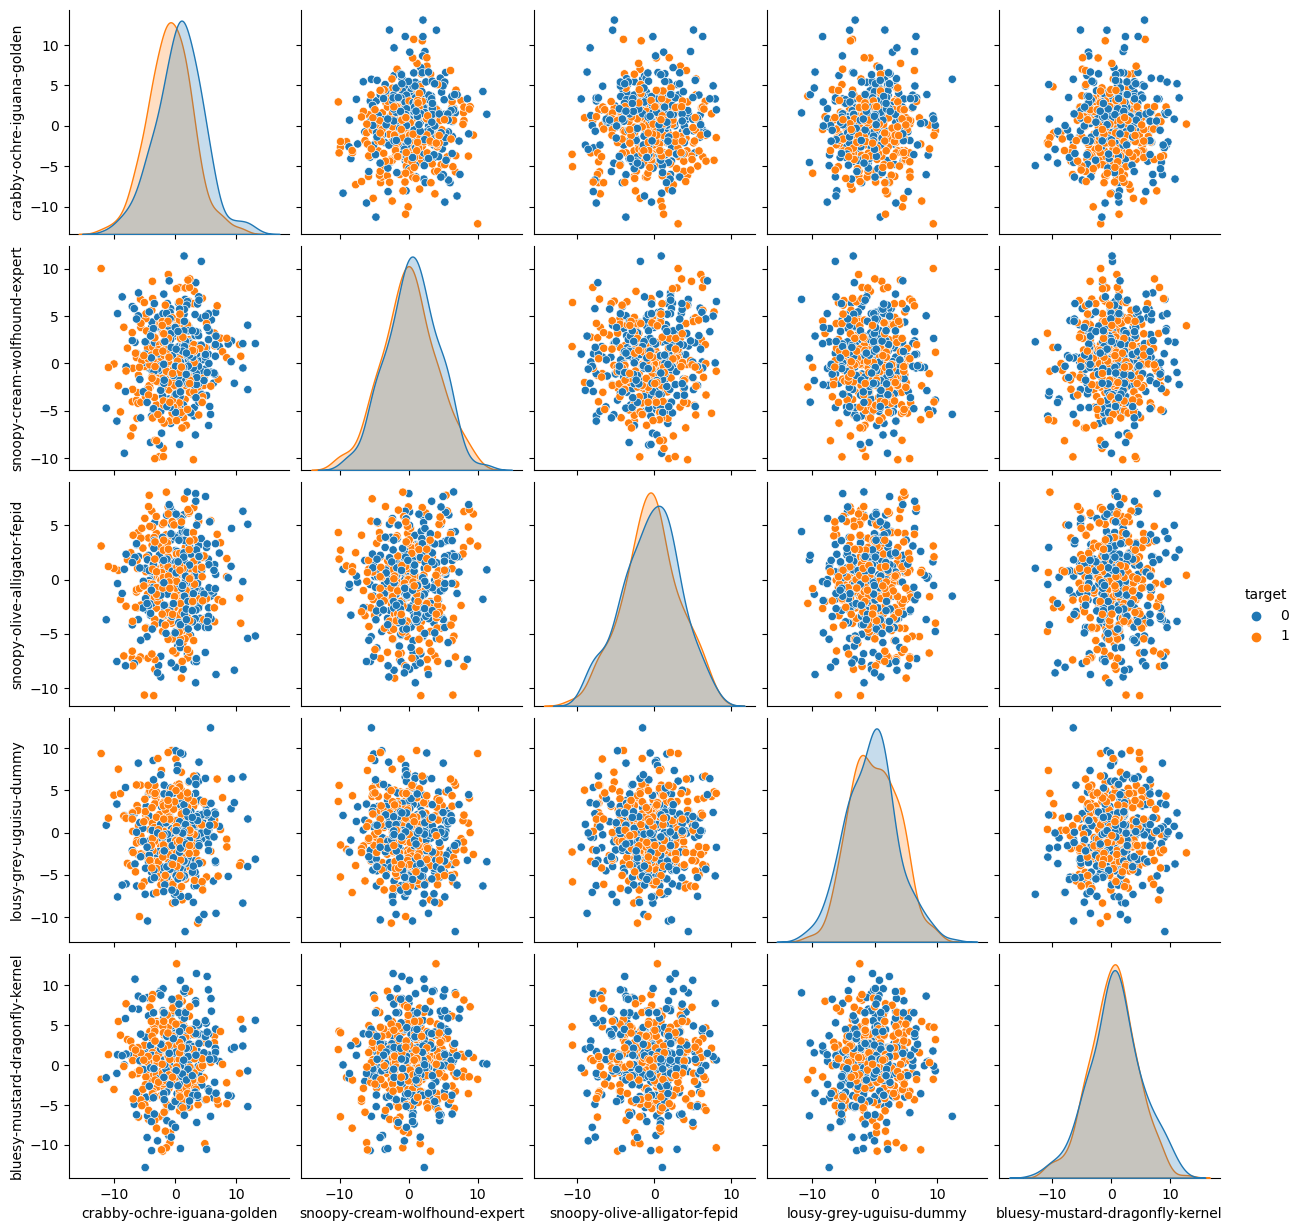

In [35]:
train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
x_train = train[train['wheezy-copper-turtle-magic'] == 0]
train_std = x_train[train_columns].std()
cols = list(train_std.index.values[np.where(train_std >2)])
target1 = x_train.loc[x_train['target']==1]
target0 = x_train.loc[x_train['target']==0]
sns.pairplot(x_train[cols[:5]+['target']],hue='target')
#sns.pairplot(target0[cols[:5]]) 